In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cleaned_df.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2895 non-null   int64  
 1   MSZoning       2895 non-null   object 
 2   LotFrontage    2895 non-null   float64
 3   LotArea        2895 non-null   int64  
 4   Street         2895 non-null   object 
 5   LotShape       2895 non-null   object 
 6   LandContour    2895 non-null   object 
 7   Utilities      2895 non-null   object 
 8   LotConfig      2895 non-null   object 
 9   LandSlope      2895 non-null   object 
 10  Neighborhood   2895 non-null   object 
 11  Condition1     2895 non-null   object 
 12  Condition2     2895 non-null   object 
 13  BldgType       2895 non-null   object 
 14  HouseStyle     2895 non-null   object 
 15  OverallQual    2895 non-null   int64  
 16  OverallCond    2895 non-null   int64  
 17  YearBuilt      2895 non-null   int64  
 18  YearRemo

In [4]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [5]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
# Data to be predicted
df_to_predict = df[df['SalePrice'].isnull()]
df_to_predict = df_to_predict.drop(['SalePrice'], axis = 1)

In [7]:
df = df.dropna()

In [8]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## LassoCV

In [11]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [12]:
lassoCV = LassoCV(eps=0.001, n_alphas=105, cv=10, tol=0.0001)

In [13]:
lassoCV.fit(X_train,y_train)

LassoCV(cv=10, n_alphas=105)

In [14]:
y_pred = lassoCV.predict(X_test)

In [15]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [16]:
r2_score(y_test,y_pred)

0.90096213012719

In [17]:
MAE

15489.744581931445

In [18]:
RMSE

21929.012936093233

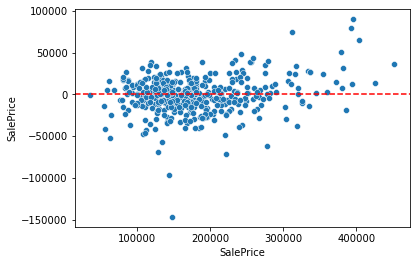

In [19]:
test_residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [20]:
test_residuals.sort_values(ascending=False)

759      90210.654628
1163     79425.964019
218      74835.961042
231      64845.556598
1246     50516.232157
            ...      
1028    -61962.099537
653     -68623.898278
405     -71051.505184
576     -96958.031895
1302   -146819.733122
Name: SalePrice, Length: 431, dtype: float64

In [21]:
from sklearn.model_selection import cross_validate

In [22]:
scores = cross_validate(lassoCV,X_train,y_train,
                         scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',
                                  'neg_mean_squared_error', 'max_error'],cv=5)

In [23]:
pd.DataFrame(scores)

,fit_time,score_time,test_neg_mean_absolute_error,test_neg_root_mean_squared_error,test_neg_mean_squared_error,test_max_error
0,1.584056,0.002998,-13243.355916,-19474.800388,-3.792679e+08,-82181.387537
1,1.070209,0.002540,-17317.864665,-25937.093648,-6.727328e+08,-152244.704951
2,1.043939,0.001002,-14957.712968,-20762.903078,-4.310981e+08,-87552.054053
3,1.285615,0.001485,-15744.959743,-26311.436090,-6.922917e+08,-166228.845630
4,1.000770,0.002007,-15543.608963,-20951.518049,-4.389661e+08,-81231.391949


In [24]:
pd.DataFrame(scores).mean()

fit_time                            1.196918e+00
score_time                          2.006292e-03
test_neg_mean_absolute_error       -1.536150e+04
test_neg_root_mean_squared_error   -2.268755e+04
test_neg_mean_squared_error        -5.228713e+08
test_max_error                     -1.138877e+05
dtype: float64

In [25]:
final_model = LassoCV(eps=0.001, n_alphas=105, cv=10, tol=0.0001)

In [26]:
lassoCV.fit(X,y)

LassoCV(cv=10, n_alphas=105)

In [27]:
lassoCV.score(X,y)

0.8010189668066652

In [28]:
scores = cross_validate(lassoCV,X,y,
                         scoring=['neg_mean_absolute_error','neg_root_mean_squared_error',
                                  'neg_mean_squared_error', 'max_error'],cv=5)

In [29]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [30]:
y_pred = cross_val_predict(lassoCV, X, y, cv=10)

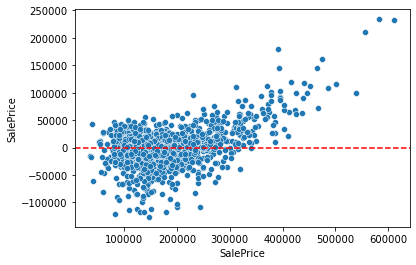

In [31]:
test_residuals = y - y_pred
sns.scatterplot(x=y, y=test_residuals)
plt.axhline(y=0, color='red', ls='--');

In [32]:
test_residuals.sort_values()

1302   -126330.356397
620    -121228.931177
66     -117880.169239
1203   -117710.183885
653    -116874.785981
            ...      
185     160743.497186
675     178601.464069
1030    209943.250418
883     232265.559200
788     233637.154218
Name: SalePrice, Length: 1436, dtype: float64

In [32]:
test = pd.read_csv('test.csv')

In [33]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [34]:
result = lassoCV.predict(df_to_predict)

In [35]:
submission = pd.DataFrame({'Id':test['Id'],'SalePrice':result})

In [36]:
submission['SalePrice'] = submission['SalePrice'].astype(int)
print(submission.shape)

(1459, 2)


In [37]:
filename = 'house_preds.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: house_preds.csv
